# Pymaceuticals Inc.
---

### Statisical Analysis

Capomulin and Ramicane were the two drugs that were tested the most considering the amount of samples in the data.
The distribution of samples in respect to sex of the mice was generally even, where 50.4% of the samples were male and 49.6% were female.
Capomulin appears to be the most consistent out of the 10 drugs in the trials where its standard deviation and standard error were the least between all drugs.
The line chart of the chosen sample mouse #l509 displays the effectiveness of capomulin over a span of days, where the tumor volume steadily decreased overtime, however it is important to note there was a very slight increase towards the later days which may mean the drug has an optimal period for when the drug is the most effective.
The correlation between the weight of the mouse and the size of the tumor was calculated to be 0.84. This shows us that there is a strong positive correlation that when weight of the mouse increases, so does the volume of the tumor. We could look into why this may be the case, considering factors such as if the treatment may be less effective depending on how heavy the sample is.
We can also view this assocation between tumor volume and weight in the regression analysis. Our linear regression line was at a positive slope which shows how our dependent variable (tumor volume) and will change as a result of our independent variable (mouse weight).
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how = "left")

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice = len(combined_df["Mouse ID"].unique())
print(mice)

249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Had to look up .duplicated method to find the duplicated mouse

duplicated_mouse = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
print(duplicated_mouse)

['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_df = combined_df.loc[combined_df["Mouse ID"] == "g989"]
duplicate_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mouse_df = combined_df.loc[combined_df["Mouse ID"] != "g989"]
cleaned_mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_mice = len(cleaned_mouse_df["Mouse ID"].unique())
print(cleaned_mice)

248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean = cleaned_mouse_df["Tumor Volume (mm3)"].groupby(cleaned_mouse_df["Drug Regimen"]).mean()
median = cleaned_mouse_df["Tumor Volume (mm3)"].groupby(cleaned_mouse_df['Drug Regimen']).median()
variance = cleaned_mouse_df['Tumor Volume (mm3)'].groupby(cleaned_mouse_df['Drug Regimen']).var()
std = cleaned_mouse_df['Tumor Volume (mm3)'].groupby(cleaned_mouse_df['Drug Regimen']).std()
sem = cleaned_mouse_df['Tumor Volume (mm3)'].groupby(cleaned_mouse_df['Drug Regimen']).sem()

# Assemble the resulting series into a single summary DataFrame.

summary_df = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":variance, 
                           "Tumor Volume Std. Dev.":std, 
                           "Tumor Volume Std. Err.":sem})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
cleaned_mouse_df["Tumor Volume (mm3)"].groupby(cleaned_mouse_df["Drug Regimen"]).mean()

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line

summary_new =  cleaned_mouse_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_new

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [10]:
#creating a small data frame for easier plotting purposes
number_of_mice = pd.DataFrame(cleaned_mouse_df["Drug Regimen"].value_counts())
number_of_mice

,count
Drug Regimen,
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Infubinol,178
Ceftamin,178


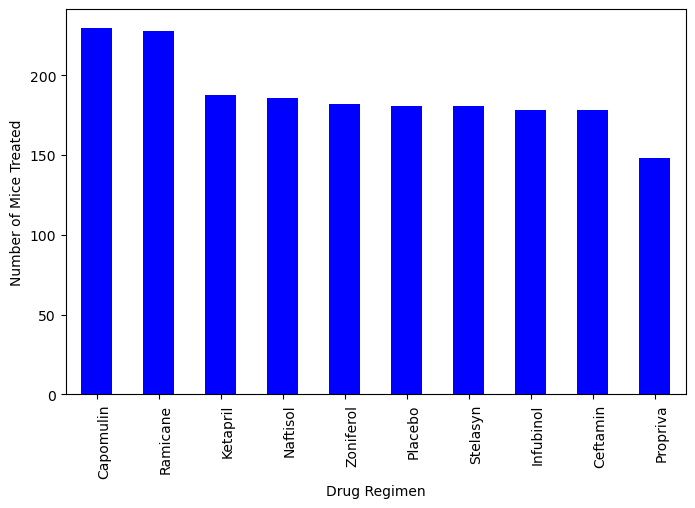

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

mice_per_drug = cleaned_mouse_df["Drug Regimen"].value_counts()


pandas_bar = mice_per_drug.plot(kind="bar", color="blue", figsize=(8,5))
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Treated")

# Configure x-tick rotation
# keep in mind even without configuring the x-tick rotation, it automatically set them at 90 degrees already
xticklabels = mice_per_drug.index
pandas_bar.set_xticklabels(xticklabels, rotation= 90, rotation_mode="anchor", ha="right", wrap=True)

# Show plot
plt.show()

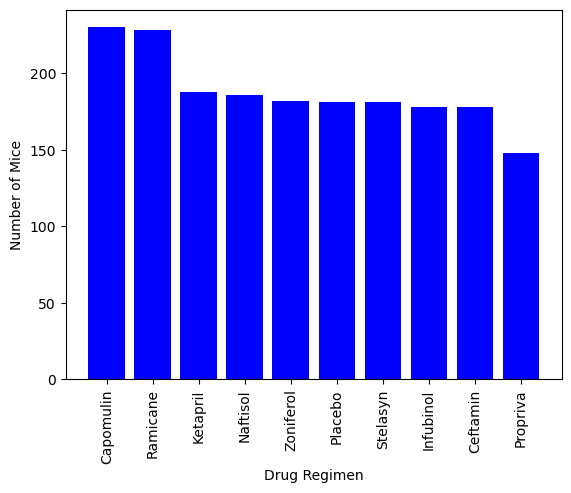

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

mice_per_drug = cleaned_mouse_df["Drug Regimen"].value_counts()

x_axis = mice_per_drug.index.values
y_axis = mice_per_drug.values

plt.bar(x_axis, y_axis, color= "blue", alpha=1, align='center')

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation= 90)

plt.show()


In [13]:
#creating a small dataframe to make it easier to plot to compare the sex (male vs. female) and the number of times
#each value occurs to get the count without duplicates

gender_rows = cleaned_mouse_df.loc[:, ["Sex", "Mouse ID"]]
gender_rows = gender_rows.drop_duplicates()
gender_count = gender_rows["Sex"].value_counts()
gender_data = pd.DataFrame({"Total Count": gender_count})

gender_data

,Total Count
Sex,
Male,125
Female,123


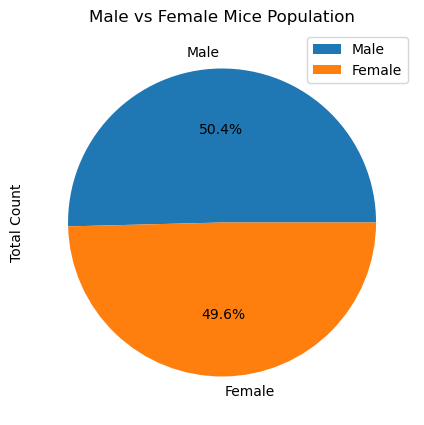

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pandas_pie = gender_data.plot(kind="pie", figsize=(9,5), y="Total Count", title="Male vs Female Mice Population",
                              autopct="%1.1f%%")

([<matplotlib.patches.Wedge at 0x13919e510>,
 [Text(-0.013934097579311132, 1.0999117423341975, 'Male'),
  Text(0.013934097579310996, -1.0999117423341975, 'Female')],
 [Text(-0.007600416861442434, 0.5999518594550168, '50.4%'),
  Text(0.007600416861442361, -0.5999518594550168, '49.6%')])

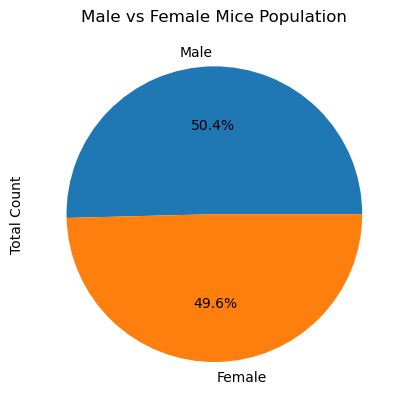

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Male", "Female"]
plt.title("Male vs Female Mice Population")
plt.ylabel("Total Count")

plt.pie(gender_count, labels=labels, autopct="%1.1f%%")

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = cleaned_mouse_df.groupby(["Mouse ID"])["Timepoint"].max()
last_timepoint = last_timepoint.reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data_last_time = last_timepoint.merge(cleaned_mouse_df, on= ["Mouse ID", "Timepoint"], how = "left")
merged_data_last_time

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = merged_data_last_time.loc[merged_data_last_time["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data.append(tumor_volume)
    
    quartiles = tumor_volume.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq 
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
    print(f"{drug}'s, potential outliers are: {outliers}")

Capomulin's, potential outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's, potential outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's, potential outliers are: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's, potential outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)


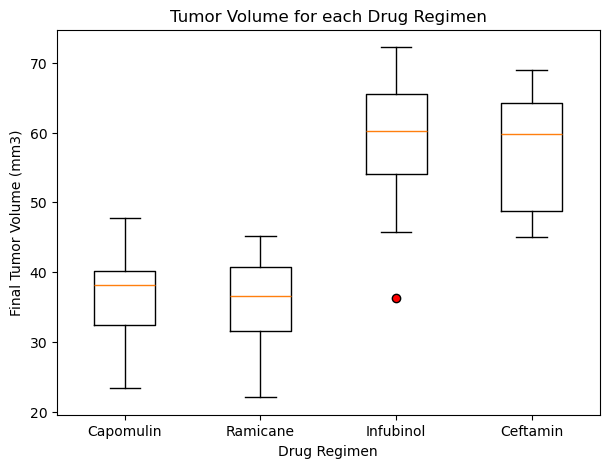

In [31]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

fig1, ax1 = plt.subplots(figsize=(7,5))
flierprops = dict(marker='o', markerfacecolor='r')
ax1.set_title('Tumor Volume for each Drug Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(tumor_vol_data, labels=treatments, flierprops=flierprops)

plt.show()

## Line and Scatter Plots

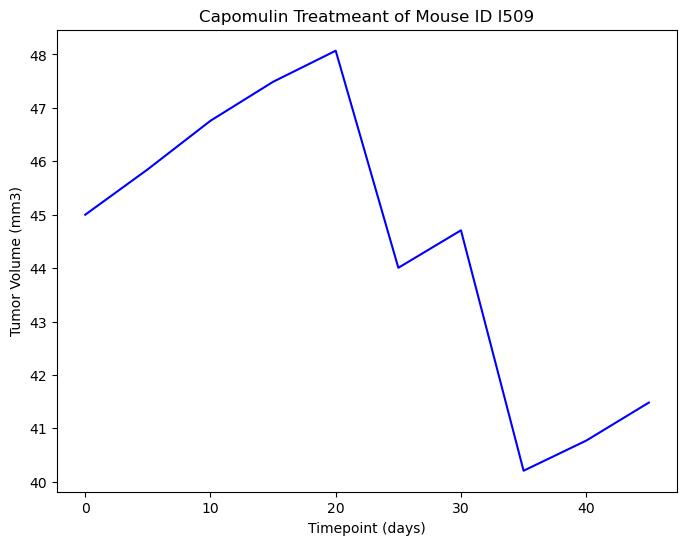

In [19]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = cleaned_mouse_df.loc[cleaned_mouse_df["Drug Regimen"] == "Capomulin",:]

#treatment of mouse #l509
capomulin_mouse = capomulin_df.loc[capomulin_df["Mouse ID"] == "l509",:]
capomulin_mouse

x_axis = capomulin_mouse["Timepoint"]
tumor_volume = capomulin_mouse["Tumor Volume (mm3)"]

line, ax1 = plt.subplots(figsize=(8, 6))
plt.title("Capomulin Treatmeant of Mouse ID l509")
plt.plot(x_axis, tumor_volume, color="blue")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

In [20]:
#created a new table here dropping the non numeric columns because I ran into an a type error trying to perform
#a mean on a groupby
new_capomulin = capomulin_df.drop(columns=["Drug Regimen", "Sex"])
new_capomulin

,Mouse ID,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,3,17,0,45.000000,0
11,s185,3,17,5,43.878496,0
12,s185,3,17,10,37.614948,0
13,s185,3,17,15,38.177232,0
14,s185,3,17,20,36.866876,0
...,...,...,...,...,...,...
440,i557,1,24,45,47.685963,1
1452,r157,22,25,0,45.000000,0
1453,r157,22,25,5,45.597064,0
1454,r157,22,25,10,46.059608,0


In [21]:
#cleaned up the same table more using a groupby, the mouse ID is now the index to use when producing the scatterplot
new_capomulin = new_capomulin.groupby(["Mouse ID"]).mean()
new_capomulin

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.70
b742,7.0,21.0,22.5,40.083699,0.00
f966,16.0,17.0,10.0,36.505973,0.00
g288,3.0,19.0,22.5,41.990097,0.80
g316,22.0,22.0,22.5,44.613344,1.00
i557,1.0,24.0,22.5,44.805810,0.20
i738,23.0,20.0,22.5,39.141053,0.60
j119,7.0,23.0,22.5,44.465236,0.60
j246,21.0,21.0,17.5,43.216925,0.25


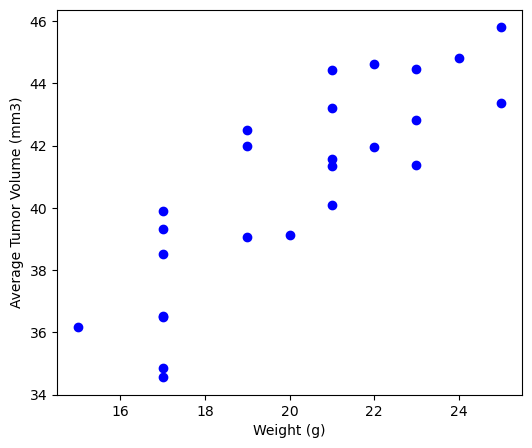

In [22]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

#generated the scatterplot using the t
fig1, ax1 = plt.subplots(figsize=(6, 5))
plt.scatter(new_capomulin["Weight (g)"], new_capomulin["Tumor Volume (mm3)"], color="blue")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is: 0.84


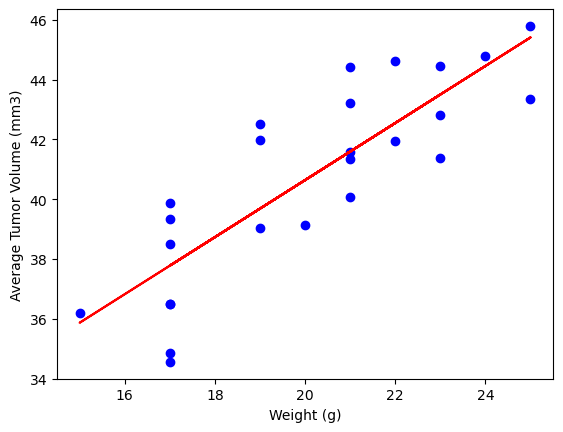

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#finding st.pearsonr
correlation = round(st.pearsonr(new_capomulin['Weight (g)'],new_capomulin['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is: {correlation}")

#building the line regression equation and held the x and y values in a variable so it was easier to plot
#without having to retype
x_values = new_capomulin["Weight (g)"]
y_values = new_capomulin["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plotting the same scatter again but with the included linear regression line
plt.scatter(new_capomulin["Weight (g)"], new_capomulin["Tumor Volume (mm3)"], color="blue")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(5.8,0.8), color = "red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
